In [29]:
# Disable jedi autocompleter
%config Completer.use_jedi = False

%load_ext autoreload
%autoreload 2

import numpy as np
import torch
import gym
from pathlib import Path
import os
import pandas as pd
import seaborn as sns

In [30]:
from compare_sim_to_real_analysis import ExperimentAnalysis, SimRealCompare

real analysis length:  22
sim analysis length:  22
Check for equality between noises:  True
Check for equality between noises:  False
Difference detected (real / sim):  [0.0 0.03 0.0] [0.0 -0.03 0.0]
Check for equality between noises:  False
Difference detected (real / sim):  [0.03 0.03 0.0] [0.03 -0.03 0.0]
Check for equality between noises:  False
Difference detected (real / sim):  [0.02 0.03 0.0] [0.02 -0.03 0.0]
Check for equality between noises:  False
Difference detected (real / sim):  [-0.03 0.03 0.0] [-0.03 -0.03 0.0]
Check for equality between noises:  False
Difference detected (real / sim):  [-0.02 0.03 0.0] [-0.02 -0.03 0.0]
Check for equality between noises:  False
Difference detected (real / sim):  [0.0 0.035 0.0] [0.0 -0.035 0.0]
Check for equality between noises:  False
Difference detected (real / sim):  [0.03 0.035 0.0] [0.03 -0.035 0.0]
Check for equality between noises:  False
Difference detected (real / sim):  [-0.03 0.035 0.0] [-0.03 -0.035 0.0]
Check for equality b

/home/mechagodzilla/sim-to-real-kinova/src/sim-to-real-kinova-master/openai_gym_kinova/src/compare_sim_to_real_analysis.py:116: RuntimeWarning: invalid value encountered in arccos
  angle_difference = np.arccos(quaternion_dot_prod)  # in degrees
/home/mechagodzilla/sim-to-real-kinova/src/sim-to-real-kinova-master/openai_gym_kinova/src/compare_sim_to_real_analysis.py:125: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.reward_buffer = np.array([np.load(filepath) for filepath in reward_filepaths])
/home/mechagodzilla/sim-to-real-kinova/src/sim-to-real-kinova-master/openai_gym_kinova/src/compare_sim_to_real_analysis.py:126: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different

[Text(0.5, 1.0, 'Grasp Success over X and Y noise from ideal object position'),
 Text(0.5, 0, 'X Noise (m)'),
 Text(0, 0.5, 'Y Noise (m)')]

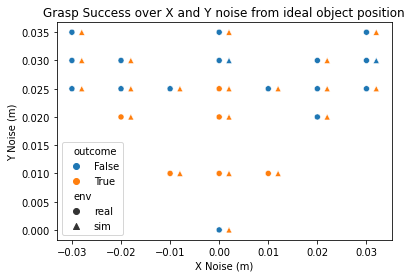

In [36]:

# hardcoded params. TODO: change the values of these bad boys with argparse.
base_location = np.array([0, 0, 0])
ideal_grasp_quat = np.array([np.pi / 2, 0, 0, np.pi / 2])

# make results directory first...
real_dir = 'real_positional_test_v2_constant'
real_dir = 'real_positional_test_v3_constant'
# TODO: Add relative directory
assert Path(real_dir).exists(), 'Check that the real log directory ' + real_dir + ' exists.'

# make results directory first...
sim_dir = 'sim_positional_test_v3_constant'
# TODO: Add relative directory
assert Path(sim_dir).exists(), 'Check that the sim log directory ' + sim_dir + ' exists.'

sim_real_compare = SimRealCompare(real_dir, sim_dir, base_location=base_location, ideal_grasp_quat=ideal_grasp_quat)

# keep all the arrays out here, and append. we will create df at the end.
# why? because if you append to a df, new arrays are copied over every single time.
x_noise_arr = []
y_noise_arr = []
outcome_arr = []  # will either be 'both succeed', 'both fail', 'real succeed sim fails', 'sim succeed real fails'
obs_arr = []
action_arr = []
env_arr = []

for episode_idx in range(len(sim_real_compare)):
    comparison_dict = sim_real_compare.get_episode_data(episode_idx)
    noise_arr = comparison_dict['noise'][0]

    x_noise = noise_arr[0]
    y_noise = noise_arr[1]
    # z_noise = noise_arr[2]

    x_noise_arr.append(x_noise)
    y_noise_arr.append(y_noise)
    
    # append twice
    x_noise_arr.append(x_noise + 0.002)
    y_noise_arr.append(y_noise)

    real_success = comparison_dict['success'][0]
    sim_success = comparison_dict['success'][1]

#     if real_success and sim_success:
#         outcome_arr.append('both succeed')
#     elif not real_success and not sim_success:
#         outcome_arr.append('both fail')
#     elif real_success and not sim_success:
#         outcome_arr.append('real succeed sim fails')
#     elif not real_success and sim_success:
#         outcome_arr.append('sim succeed real fails')
        
    env_arr.append('real')
    outcome_arr.append(real_success)
    
    env_arr.append('sim')
    outcome_arr.append(sim_success)
    
    
    

reward_df = pd.DataFrame({
    'x_noise': x_noise_arr,
    'y_noise': y_noise_arr,
    'outcome': outcome_arr,
    'env': env_arr
})

# draw visualization: x and y noise to success rate
xy_noise_success_plot = sns.scatterplot(data=reward_df, x='x_noise', y='y_noise', hue='outcome', style='env', markers={'real':'o', 'sim':'^'})
xy_noise_success_plot.set(title='Grasp Success over X and Y noise from ideal object position', xlabel='X Noise (m)',
                          ylabel='Y Noise (m)')

# xy_noise_success_plot.get_figure().savefig(os.path.join(results_dir, 'xy_noise_success' + '.png'))
# xy_noise_success_plot.get_figure().clf()

# # draw visualization: translation error and quaternion distance to success rate
# trans_err_quat_dist_success_plot = sns.scatterplot(data=reward_df, x='trans_err', y='quat_dist', hue='outcome')
# trans_err_quat_dist_success_plot.set(
#     # title='Grasp Success over Translation Error (object position to ideal position) and Quaternion Distance (from ideal hand grasp)',
#     xlabel='Translation Error (m)', ylabel='Quaternion Distance (rad)')
# trans_err_quat_dist_success_plot.show()


In [17]:
reward_df

,x_noise,y_noise,outcome
0,0.00,0.000,real succeed sim fails
1,0.00,0.030,both fail
2,0.03,0.030,both fail
3,0.02,0.030,both fail
4,-0.03,0.030,both fail
5,-0.02,0.030,both fail
6,0.00,0.040,both fail
7,-0.04,0.040,both fail
8,-0.03,0.040,both fail
9,0.03,0.040,both fail


In [66]:
"""
State observation comparison

1. Get both streams
2. Compare values
3. Plot delta
"""

obs_streams = sim_real_compare.get_episode_data(0)['obs']

real_stream, sim_stream = obs_streams


Check for equality between noises:  True


In [22]:
real_stream.shape

(8, 31)

In [25]:
real_stream[:, 0]

array([0.07183261, 0.07183261, 0.07177802, 0.07188682, 0.07241076,
       0.07241076, 0.07241076, 0.0763295 ])

In [65]:
import matplotlib.pyplot as plt

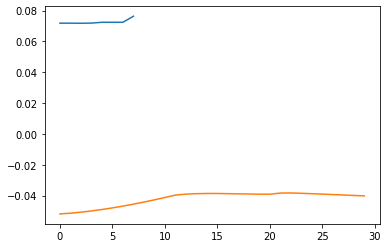

In [30]:
plt.plot(np.arange(real_stream.shape[0]), real_stream[:, 0], label='real')
plt.plot(np.arange(30), sim_stream[:30, 0], label='sim')

In [37]:
15*real_stream.shape[-1]

465

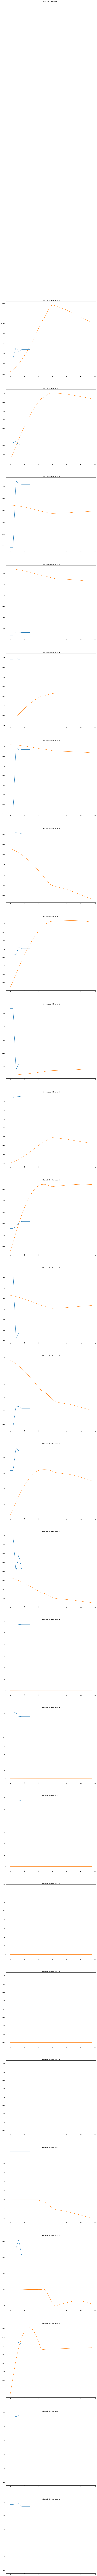

In [69]:
fig, axs = plt.subplots(real_stream.shape[-1], figsize=(15, 15*real_stream.shape[-1]))
fig.suptitle('Sim to Real comparison')

for i in range(real_stream.shape[-1]):
    axs[i].set_title('Obs variable with index: ' + str(i))
    axs[i].plot(np.arange(real_stream.shape[0]), real_stream[:, i], label='real')
    axs[i].plot(np.arange(30), sim_stream[:30, i], label='sim')

In [68]:


obs_stuff = np.load()

TypeError: load() missing 1 required positional argument: 'file'

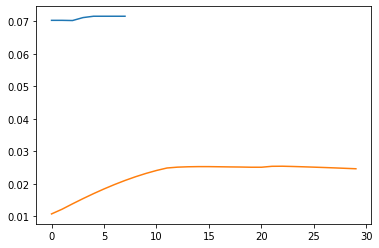

In [47]:
plt.plot(np.arange(real_stream.shape[0]), real_stream[:, 0], label='real')
plt.plot(np.arange(30), sim_stream[:30, 1], label='sim')

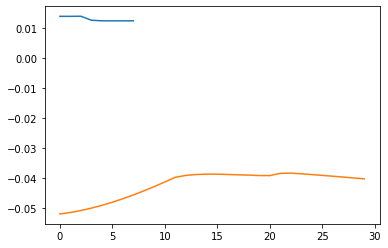

In [48]:
plt.plot(np.arange(real_stream.shape[0]), real_stream[:, 1], label='real')
plt.plot(np.arange(30), sim_stream[:30, 0], label='sim')

In [ ]:
plt.plot(np.arange(real_stream.shape[0]), real_stream[:, 0], label='real')
plt.plot(np.arange(30), sim_stream[:30, 1], label='sim')

In [50]:
sim_stream.shape

(45, 82)

In [76]:
from utils import state_dim_setup

bruh_idx = state_dim_setup('adam_sim2real_v02')

sim_reduced_stream = sim_stream[:, bruh_idx]

In [77]:
sim_reduced_stream.shape

(35, 26)

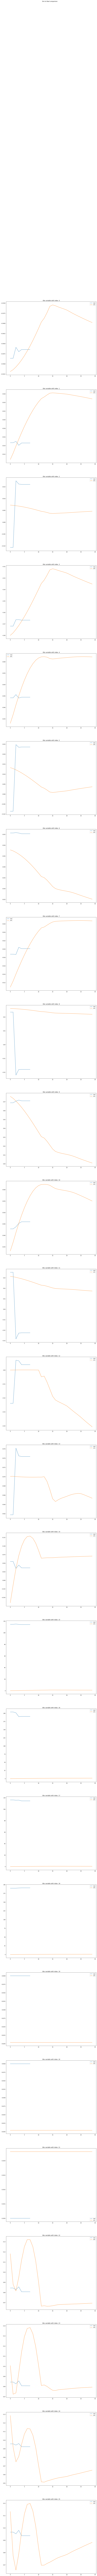

In [79]:
fig, axs = plt.subplots(real_stream.shape[-1], figsize=(15, 15*real_stream.shape[-1]))
fig.suptitle('Sim to Real comparison')

for i in range(real_stream.shape[-1]):
    axs[i].set_title('Obs variable with index: ' + str(i))
    axs[i].plot(np.arange(real_stream.shape[0]), real_stream[:, i], label='real')
    axs[i].plot(np.arange(30), sim_reduced_stream[:30, i], label='sim')
    axs[i].legend()

In [56]:
sim_reduced_stream[:, [19, 20, 21]]

array([[0.        , 0.        , 0.        ],
       [0.06893435, 0.06891478, 0.03319582],
       [0.15072207, 0.15067645, 0.07435771],
       [0.23255654, 0.23248221, 0.11548043],
       [0.31439292, 0.31428755, 0.15647942],
       [0.3962289 , 0.39609048, 0.19742551],
       [0.47806508, 0.47789191, 0.23835347],
       [0.55990171, 0.55969245, 0.27927576],
       [0.64173879, 0.64149243, 0.32019641],
       [0.7235762 , 0.72329206, 0.36111663],
       [0.80541375, 0.80509156, 0.40203675],
       [0.88593421, 0.88606488, 0.44246292],
       [0.93998794, 0.94187588, 0.45653105],
       [0.98195524, 0.98756266, 0.46207773],
       [1.01781641, 1.02659655, 0.46437528],
       [1.04840472, 1.06230564, 0.46367929],
       [1.0753732 , 1.09526034, 0.46066762],
       [1.09940628, 1.12498576, 0.45763993],
       [1.11697874, 1.15278205, 0.45557513],
       [1.13612801, 1.18579991, 0.45153935],
       [1.18079985, 1.21983283, 0.45128575],
       [1.24867684, 1.26318462, 0.47129912],
       [1.

In [59]:
sim_reduced_stream[:, -7:]

array([[0.02037104, 0.02037104, 0.1054625 , 0.11817196, 0.10062105,
        0.12856929, 0.11328648],
       [0.02037104, 0.02037104, 0.1054625 , 0.10014058, 0.08438343,
        0.10840284, 0.09453413],
       [0.02037104, 0.02037104, 0.1054625 , 0.08476819, 0.07244493,
        0.08994973, 0.07876598],
       [0.02037104, 0.02037104, 0.1054625 , 0.07540288, 0.0673479 ,
        0.07809085, 0.07053141],
       [0.02037104, 0.02037104, 0.1054625 , 0.06895622, 0.06511124,
        0.0706203 , 0.06699347],
       [0.02037104, 0.02037104, 0.1054625 , 0.06392632, 0.06392627,
        0.06663068, 0.06674994],
       [0.02037104, 0.02037104, 0.1054625 , 0.06112252, 0.06460064,
        0.06691999, 0.07024689],
       [0.02037104, 0.02037104, 0.1054625 , 0.05544266, 0.06314033,
        0.0621051 , 0.06911682],
       [0.02037104, 0.02037104, 0.1054625 , 0.04910865, 0.06135364,
        0.05609156, 0.06707698],
       [0.02037104, 0.02037104, 0.1054625 , 0.04310703, 0.05995571,
        0.05070283, 0.0

In [81]:
fig.clear()


[autoreload of compare_sim_to_real_analysis failed: Traceback (most recent call last):
  File "/home/mechagodzilla/kinova_venv/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/home/mechagodzilla/kinova_venv/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/usr/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/usr/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 674, in exec_module
  File "<frozen importlib._bootstrap_external>", line 781, in get_code
  File "<frozen importlib._bootstrap_external>", line 741, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/home/mechagodzilla/sim-

In [90]:
"{:.[4f}".format(0.230)[2:]

[autoreload of compare_sim_to_real_analysis failed: Traceback (most recent call last):
  File "/home/mechagodzilla/kinova_venv/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/home/mechagodzilla/kinova_venv/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/usr/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/usr/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 674, in exec_module
  File "<frozen importlib._bootstrap_external>", line 781, in get_code
  File "<frozen importlib._bootstrap_external>", line 741, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/home/mechagodzilla/sim-

'2300'

In [7]:
import imageio


bruv_gif = imageio.get_reader('/home/mechagodzilla/sim-to-real-kinova/src/sim-to-real-kinova-master/openai_gym_kinova/src/sim_positional_test_v3_constant/video/debug_video_13.gif')

In [8]:
img = bruv_gif.get_next_data()

In [9]:
img.shape

(1000, 1000, 4)

Array([[[ 97, 100,  99, 255],
        [ 97, 100,  99, 255],
        [ 97, 100,  99, 255],
        ...,
        [ 97,  98,  99, 255],
        [ 97,  98,  99, 255],
        [ 97,  98,  99, 255]],

       [[ 97, 100,  99, 255],
        [ 97, 100,  99, 255],
        [ 97, 100,  99, 255],
        ...,
        [ 97,  98,  99, 255],
        [ 97,  98,  99, 255],
        [ 97,  98,  99, 255]],

       [[ 97, 100,  99, 255],
        [ 97, 100,  99, 255],
        [ 97, 100,  99, 255],
        ...,
        [ 97,  98,  99, 255],
        [ 97,  98,  99, 255],
        [ 97,  98,  99, 255]],

       ...,

       [[ 97,  98,  99, 255],
        [ 97,  98,  99, 255],
        [ 97,  98,  99, 255],
        ...,
        [ 97, 100,  99, 255],
        [ 97, 100,  99, 255],
        [ 97, 100,  99, 255]],

       [[ 97,  98,  99, 255],
        [ 97,  98,  99, 255],
        [ 97,  98,  99, 255],
        ...,
        [ 97, 100,  99, 255],
        [ 97, 100,  99, 255],
        [ 97, 100,  99, 255]],

       [[ 97

In [15]:
"{:.4f}".format(-00.03)[2:]

'.0300'

In [27]:
"{:05d}".format(int(-0.0325 * 1000))

'-0032'